<a href="https://colab.research.google.com/github/jrim42/boostcourse_13_DT/blob/main/week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 코칭스터디 4주차 미션

In [ ]:
# 한글폰트 사용을 위해 설치
!pip install koreanize-matplotlib

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import koreanize_matplotlib

plt.rc('axes', unicode_minus=False)
sns.set_palette("Set2")

# 2022년까지의 국가(대륙)별/상품군별 온라인쇼핑 해외직접판매액
# 합계, 계 데이터는 제외. 면세점 데이터는 제외.
df = pd.read_csv(
    "https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/online_oversea_sale_202210.csv.zip",
    encoding="cp949")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 62.0 MB/s eta 0:00:00


In [ ]:
print(df.shape)
df.head()
df.describe(include="object")
df["판매유형별"].value_counts()

(2772, 5)


면세점 이외    2772
Name: 판매유형별, dtype: int64

---
### Q1. 시점 컬럼에서 연도와 분기에 대한 파생변수를 생성하고 기술통계 구하기
- 데이터 컬럼을 단위인 "백만"으로 변경하기
- 해당 기술통계로 알 수 있는 정보가 무엇인지도 함께 작성하기

In [ ]:
# 소수점 적당히 잘라주는 함수
def custom_format(num):
    if num.is_integer():
        return f"{int(num):d}"
    else:
        return f"{num:.2f}"

In [ ]:
res_1 = df[['시점']].copy()
res_1['백만'] = df['데이터'].astype(int)
res_1['연도'] = res_1['시점'].str.split('.').str[0].astype(int)
res_1['분기'] = res_1['시점'].str.split('.').str[1].str[0].astype(int)

# float format 약간 수정해주기
pd.options.display.float_format = custom_format

res_1.describe()

,백만,연도,분기
count,2772,2772,2772
mean,1613.12,2019.27,2.41
std,4273.43,1.60,1.11
min,-10003,2017,1
25%,41.75,2018,1
50%,291.50,2019,2
75%,1181,2021,3
max,47689,2022,4


---
### Q2. 국가(대륙)별 연도별 판매액의 합계를 분석
- `pivot_table()` 사용하기

In [ ]:
tmp2 = df[['국가(대륙)별', '데이터']].copy()
tmp2['데이터'] = tmp2['데이터'].astype(int)
tmp2['연도'] = res_1['연도']

res_2 = tmp2.groupby(['국가(대륙)별', '연도'])['데이터'].sum().reset_index()
res_2.pivot_table(index='국가(대륙)별', columns='연도', values='데이터')

연도,2017,2018,2019,2020,2021,2022
국가(대륙)별,,,,,,
기타,41571,36141,40950,44438,57959,19501
대양주,18989,17520,13191,16255,16841,5044
미국,142292,156312,186617,255384,277579,103416
아세안(ASEAN),66163,76450,82930,105360,94150,38072
유럽연합(EU),31068,36826,39008,39865,32349,9019
일본,125442,178094,189330,220730,280029,131771
중국,167240,182068,210418,289446,194380,98572
중남미,10245,11669,12981,12563,8298,2629
중동,8030,8019,9325,11467,6164,1389


---
### Q3. 2020년의 온라인 해외판매 상품군을 지역별 합계
- 해외 어느지역에 온라인 판매가 얼마나 되었는지를 groupby() 와 unstack()을 활용해서 합계를 구하고 분석하기

In [ ]:
res_3 = res_2[(res_2['연도']==2020)].copy()
res_3 = res_3.groupby(['국가(대륙)별'])['데이터'].sum().reset_index()
res_3 = res_3.sort_values(by='데이터', ascending=False)
res_3

,국가(대륙)별,데이터
6,중국,289446
2,미국,255384
5,일본,220730
3,아세안(ASEAN),105360
0,기타,44438
4,유럽연합(EU),39865
1,대양주,16255
7,중남미,12563
8,중동,11467


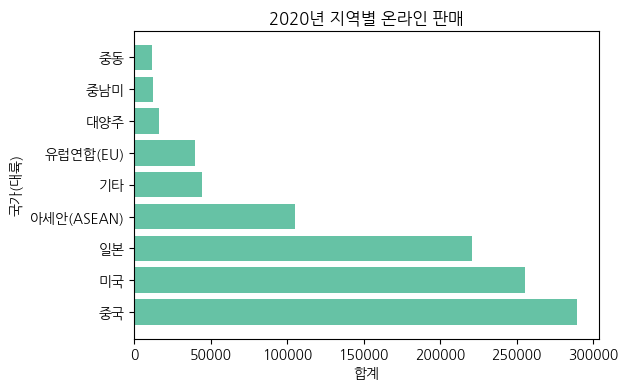

In [ ]:
plt.figure(figsize=(6, 4))
plt.barh(res_3['국가(대륙)별'], res_3['데이터'])

plt.xlabel('합계')
plt.ylabel('국가(대륙)')
plt.title('2020년 지역별 온라인 판매')

plt.show()

---
### Q4. 주요 판매 국가와 상품군에 대해 2021년까지의 연도별 온라인 직접 판매액 합계를 시각화
- 온라인 직접 판매액이 높은 지역은 "미국", "중국", "일본"
- 주요 판매 상품군은 "의류 및 패션 관련상품", "화장품", "음반·비디오·악기"
- 2021년까지의 각 지역별 제품별 판매액을 시각화


<Figure size 1600x1000 with 0 Axes>

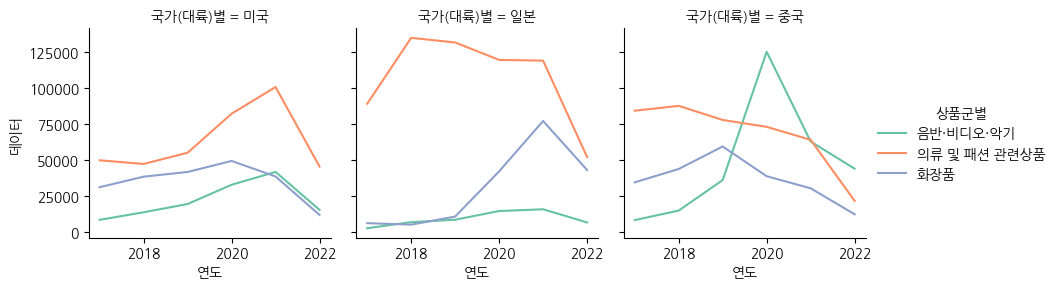

In [ ]:
df['연도'] = df['시점'].str.split('.').str[0].astype(int)

tmp_4 = df[df['국가(대륙)별'].str.contains('미국|일본|중국') &
        df['상품군별'].str.contains('의류 및 패션 관련상품|화장품|음반·비디오·악기')].copy()
res_4 = tmp_4.groupby(['국가(대륙)별', '연도', '상품군별'])['데이터'].sum().reset_index()

plt.figure(figsize=(16, 10))
g = sns.FacetGrid(res_4, col='국가(대륙)별', hue='상품군별', col_wrap=3)
g.map(sns.lineplot, '연도', '데이터')
g.add_legend()

plt.show()

---
### Q5. KOSIS 에 있는 데이터를 하나 정해 자유롭게 분석


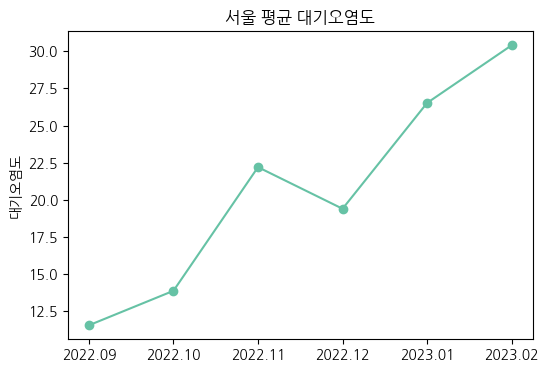

In [ ]:
from google.colab import drive

df_5 = pd.read_csv("./drive/MyDrive/boostcourse/data/미세먼지_PM2.5__월별_대기오염도_측정망별_시도별_도시별_측정지점별__20231031223318.csv")
df_5 = df_5[(df_5['구분(2)'] == '서울') & (df_5['구분(1)'] == '도시대기')]
df_5 = df_5.drop(['구분(1)', '구분(2)'], axis=1)

def custom_form(values):
    return sum(int(value.split('**')[0]) for value in values) / len(values)

selected_col = df_5.columns[2:]
avg_val = df_5[selected_col].apply(custom_form, axis=0)

plt.figure(figsize=(6, 4))
plt.title('서울 평균 대기오염도')
plt.ylabel('대기오염도')

plt.plot(avg_val.index, avg_val.values, marker='o', linestyle='-')
plt.xticks(range(len(selected_col)), selected_col)

plt.show()
